## About this Dataset
+ Context

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision.

If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank
If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank."

The predictors that may potentially have any influence on Creditability:

+ Account Balance: No account (1), None (No balance) (2), Some Balance (3)

+ Payment Status: Some Problems (1), Paid Up (2), No Problems (in this bank) (3)

+ Savings/Stock Value: None, Below 100 DM, [100, 1000] DM, Above 1000 DM

+ Employment Length: Below 1 year (including unemployed), [1, 4), [4, 7), Above 7

+ Sex/Marital Status: Male Divorced/Single, Male Married/Widowed, Female

+ No of Credits at this bank: 1, More than 1

+ Guarantor: None, Yes

+ Concurrent Credits: Other Banks or Dept Stores, None

+ ForeignWorker variable may be dropped from the study

+ Purpose of Credit: New car, Used car, Home Related, Other

https://online.stat.psu.edu/stat508/resource/analysis/gcd

Content

The German Credit Data contains data on 20 variables and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants. A predictive model developed on this data is expected to provide a bank manager guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.

Acknowledgements
https://online.stat.psu.edu/stat508/resource/analysis/gcd

Photo by Alice Pasqual on Unsplash

Inspiration
Unemployment in time of crisis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data and EDA

In [2]:
data = pd.read_csv('german.csv', sep=';')
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [3]:
data.shape

(1000, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [5]:
data.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

<AxesSubplot:>

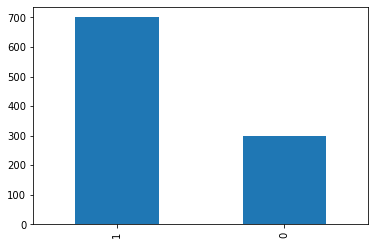

In [6]:
# Plotting the imbalanced dataset
data.Creditability.value_counts().plot(kind = 'bar')

In [7]:
data.isnull().sum()

Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64

In [8]:
# Target
y = data.Creditability

# Features
X = data.drop('Creditability', axis = 1)

In [9]:
features = X.columns
features

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

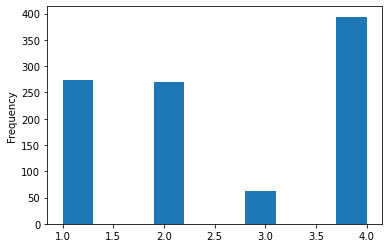

In [10]:
X.Account_Balance.plot(kind = 'hist')

In [11]:
X['Account_Balance'].value_counts()

4    394
1    274
2    269
3     63
Name: Account_Balance, dtype: int64

In [12]:
tran_acc_bal = X['Account_Balance'].value_counts() / len(X) * 100
tran_acc_bal

4    39.4
1    27.4
2    26.9
3     6.3
Name: Account_Balance, dtype: float64

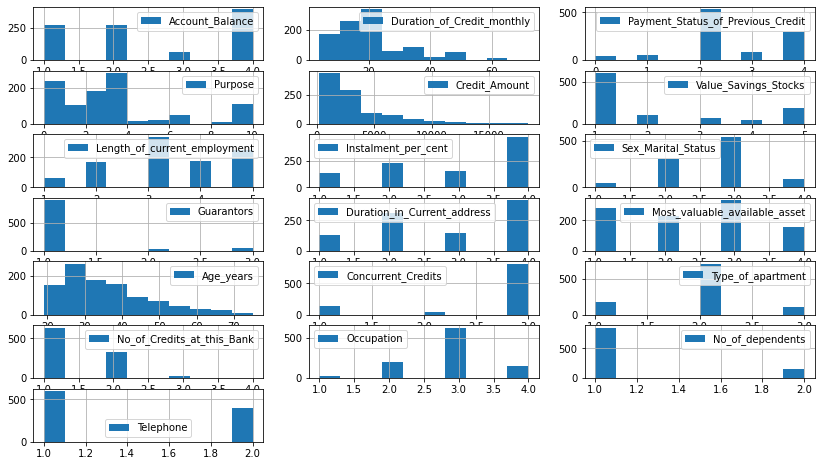

In [13]:
plt.figure(figsize = (14, 8))
for i, j in zip(range(1, 20), features):
    
    plt.subplot(7, 3, i)
    
    X[j].hist(label = j)
    
    plt.legend()

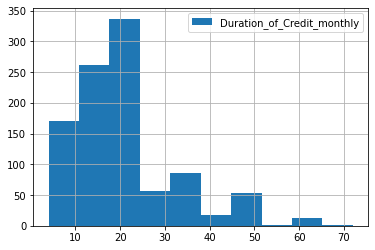

In [14]:
X['Duration_of_Credit_monthly'].hist(label = features[1])
plt.legend()

Most of the loans applied for are to be paid within two years..

In [15]:
X['Payment_Status_of_Previous_Credit'].value_counts()

2    530
4    293
3     88
1     49
0     40
Name: Payment_Status_of_Previous_Credit, dtype: int64

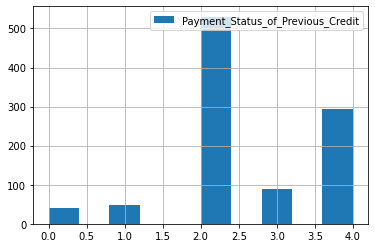

In [16]:
X['Payment_Status_of_Previous_Credit'].hist(label = [features[2]])
plt.legend()

In [17]:
X['Purpose'].value_counts()

3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64

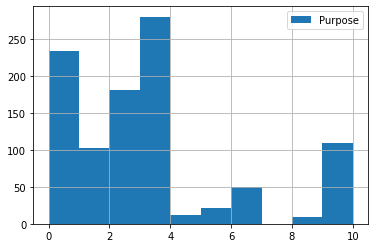

In [18]:
X['Purpose'].hist(label = features[3])
plt.legend()

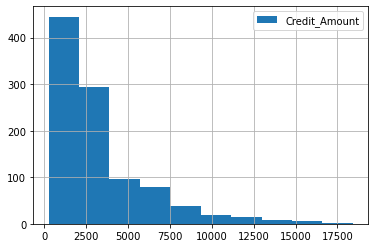

In [19]:
X['Credit_Amount'].hist(label = features[4])
plt.legend()

Most of the loan applications are for amounts less than 10,000

In [20]:
X['Credit_Amount'].describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: Credit_Amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

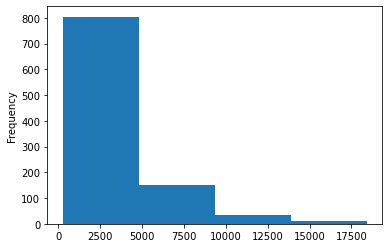

In [21]:
X['Credit_Amount'].plot(kind = 'hist', bins = 4)

<AxesSubplot:>

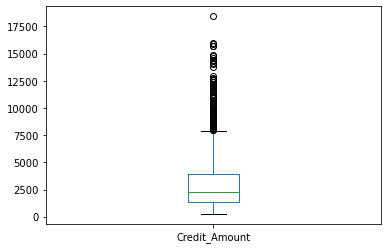

In [22]:
X['Credit_Amount'].plot(kind = 'box')

In [23]:
len(X.loc[X['Credit_Amount'] > 5000]) / len(X) * 100

18.8

In [24]:
len(X.loc[X['Credit_Amount'] > 10000]) / len(X) * 100

4.0

Half of the applications are below 2,500. Only about 20% of the loan applications exceed 5,000 and 4% exceeding 10000

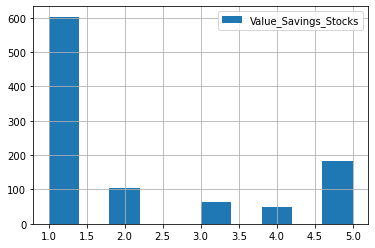

In [25]:
X['Value_Savings_Stocks'].hist(label = features[5])
plt.legend()

In [26]:
X['Value_Savings_Stocks'].value_counts()

1    603
5    183
2    103
3     63
4     48
Name: Value_Savings_Stocks, dtype: int64

In [27]:
len(X.loc[X['Value_Savings_Stocks'].isin([4,5])]) / len(X) * 100

23.1

About 60% of the loan applicants have no savings or do not own a stock. 23% of the applicants have over 1000DM in savings or stock holdings.

<AxesSubplot:title={'center':'Credit_Amount'}, xlabel='Value_Savings_Stocks'>

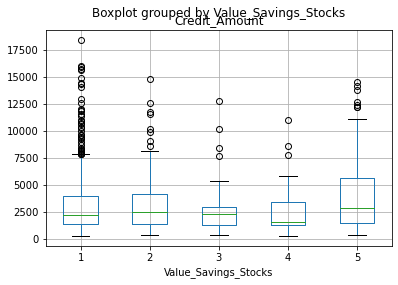

In [28]:
X.boxplot(column = 'Credit_Amount', by = 'Value_Savings_Stocks')

<AxesSubplot:>

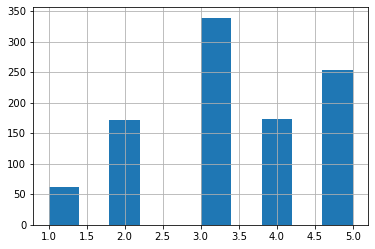

In [29]:
X['Length_of_current_employment'].hist(label = features[6])
# plt.legend()

<AxesSubplot:>

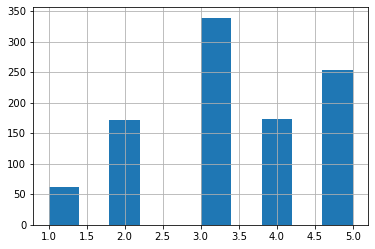

In [30]:
X['Length_of_current_employment'].hist(label = 'Length_of_current_employment')

In [31]:
X['Length_of_current_employment'].value_counts()

3    339
5    253
4    174
2    172
1     62
Name: Length_of_current_employment, dtype: int64

In [32]:
len(X[X['Length_of_current_employment'].isin([3,4,5])]) / len(X) * 100

76.6

In [33]:
len(X[X['Length_of_current_employment'].isin([1])]) / len(X) * 100

6.2

Over 75% of the applicants have a stable employment with contracts extending over four years.
Just 6% have a contract of less than a year or maybe unemployed (perhaps entrepreneurs) 

<AxesSubplot:title={'center':'Credit_Amount'}, xlabel='Length_of_current_employment'>

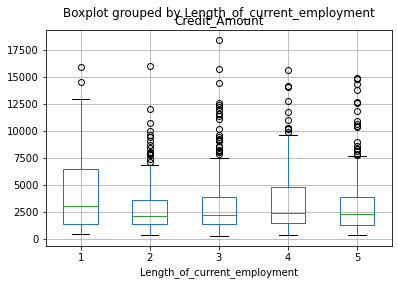

In [34]:
X.boxplot(column = 'Credit_Amount', by = 'Length_of_current_employment')

<AxesSubplot:>

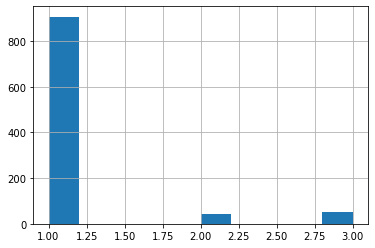

In [35]:
X['Guarantors'].hist(label = 'Guarantors')

<AxesSubplot:>

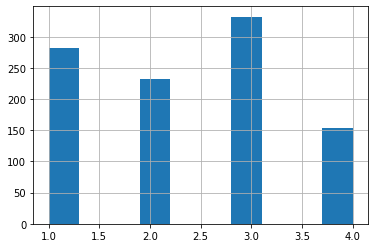

In [36]:
X['Most_valuable_available_asset'].hist(label = 'Most_valuable_available_asset')

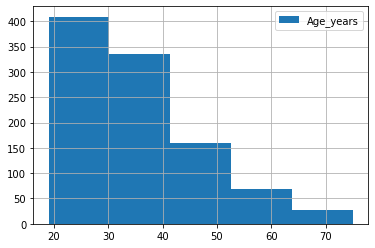

In [37]:
X['Age_years'].hist(label = 'Age_years', bins = 5)
plt.legend()

<AxesSubplot:title={'center':'Age'}>

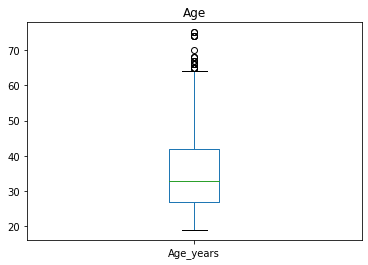

In [38]:
X['Age_years'].plot(kind = 'box', title = 'Age')

In [39]:
bins = [(20 - 25), (26 - 30), (31 - 39), (40 >)]

SyntaxError: invalid syntax (<ipython-input-39-2c588b0560f6>, line 1)

In [ ]:
X['Concurrent_Credits'].hist(label = 'Concurrent_Credits')
plt.legend()

In [ ]:
X['No_of_Credits_at_this_Bank'].hist(label = 'No_of_Credits_at_this_Bank')
plt.legend()

In [ ]:
X['Occupation'].hist(label = 'Occupation')
plt.legend()

In [ ]:
sns.regplot(x = X['Age_years'], y = X['Credit_Amount'])

## Predictive Modelling

In [ ]:
# Tree-based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# LogisticRegression
from sklearn.linear_model import LogisticRegression

# Distance-based
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model Validation
from sklearn import metrics

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

+ ## DecisionTree

In [ ]:
model_dt = DecisionTreeClassifier(random_state = 0)
model_dt.fit(X_train, y_train)

In [ ]:
preds_dt = model_dt.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_dt)
print(f'DecisionTree Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_dt)
print(class_report)

+ ## RandomForest

In [ ]:
model_rf = RandomForestClassifier(random_state = 11)
model_rf.fit(X_train, y_train)

In [ ]:
preds_rf = model_rf.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_rf)
print(f'RandomForest Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_rf)
print(class_report)

+ ## LogisticRegression

In [ ]:
model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_train, y_train)

In [ ]:
preds_lr = model_lr.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_lr)
print(f'LogisticRegression Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_lr)
print(class_report)

+ ## SupportVector

In [ ]:
model_svc = SVC()
model_svc.fit(X_train, y_train)

In [ ]:
preds_svc = model_svc.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_svc)
print(f'SupportVector Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_svc)
print(class_report)

+ ## KNeighbors

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

In [ ]:
preds_knn = model_knn.predict(X_valid)
acc_score = metrics.accuracy_score(y_valid, preds_knn)
print(f'KNeighbors Accuracy: {acc_score}')

class_report = metrics.classification_report(y_valid, preds_knn)
print('\n', class_report)

## Boosting Techniques
+ Xtreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
import lightgbm as lgb

In [ ]:
model_xgb = XGBClassifier(use_label_encoder = False)

model_xgb.fit(X_train, y_train)

In [ ]:
preds_xgb = model_xgb.predict(X_valid)
print(preds_xgb[:10])
# Accuracy
acc_xgb = metrics.accuracy_score(y_valid, preds_xgb)

print('XGB Accuracy: ', acc_xgb)

In [ ]:
print(metrics.classification_report(y_valid, preds_xgb))

+ LightGradient Boosting

In [ ]:
param = {'num_leaves': 8, 'objective': 'binary', 'metrics': 'auc'}

num_rounds = 1000

dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

In [ ]:
model_lgb = lgb.train(param, dtrain, num_rounds, valid_sets = [dvalid],
                     early_stopping_rounds = 20)

In [ ]:
preds_lgb = model_lgb.predict(X_valid)
preds_lgb[:20]

In [ ]:
p_lgb = []
for i in preds_lgb:
    if i >= 0.5:
        i = 1
        p_lgb.append(i)
    else:
        i = 0
        p_lgb.append(i)
        
print(p_lgb)

In [ ]:
# Accuracy 
acc_lgb = metrics.accuracy_score(y_valid, p_lgb)

print('LGB Accuracy: ', acc_lgb)

In [ ]:
acc_lgb = metrics.classification_report(y_valid, p_lgb)
print(acc_lgb)

## Deep Learning
+ Deep Neural Networks using Tensorflow and Keras

In [ ]:
from tensorflow.keras import Sequential, layers, callbacks

In [ ]:
model_dnn = Sequential([
    layers.Dense(224, activation = 'relu', input_shape = [20]),
    layers.BatchNormalization(),
    layers.Dense(124, activation = 'relu'),
    layers.Dense(124, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_dnn.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, 
    patience = 20,
    restore_best_weights = True
)

In [ ]:
model_dl = model_dnn.fit(X_train, y_train,
                      validation_data = (X_valid, y_valid),
                      batch_size = 128,
                      epochs = 1000,
                      callbacks = [early_stopping]
                    )

In [ ]:
dl_hist = pd.DataFrame(model_dl.history)
dl_hist.head()

In [ ]:
dl_hist.plot()

In [ ]:
dl_hist.val_loss.min()

In [ ]:
preds_dl = model_dnn.predict(X_valid)
preds_dl[:10]

In [ ]:
y_valid.head(10)

In [ ]:
data.loc[X_valid.index][:10]

In [ ]:
# DNN Accuracy
# dl_acc = metrics.accuracy_score(y_valid, preds_dl)
# print(dl_acc)

In [ ]:
tr_pdl = []
for elem in preds_dl:
    
    if elem >= 0.5:
        elem = 1
        tr_pdl.append(elem)
#         print(elem)
    else:
        elem = 0
        tr_pdl.append(elem)
#         print(elem)

In [ ]:
print(tr_pdl)

In [ ]:
print('Deep Neural Networks Accuracy')
dl_acc = metrics.accuracy_score(y_valid, tr_pdl)
dl_acc

# Using Scaled Data

In [ ]:
# from mlextend.preprocessing import minmax_scaling

In [ ]:
min_ = X_train.min(axis = 0)
max_ = X_train.max(axis = 0)
min_

In [ ]:
max_

In [ ]:
sc_train = (X_train - min_) / (max_ - min_)
sc_train

In [ ]:
sc_valid = (X_valid - min_) / (max_ - min_)
sc_valid.head()

In [ ]:
model_nn2 = Sequential([
    layers.Dense(224, activation = 'relu', input_shape = [20]),
    layers.BatchNormalization(),
    layers.Dense(224, activation = 'relu'),
    layers.Dense(224, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_nn2.compile(optimizer = 'adam', loss = 'binary_crossentropy')

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001, 
    patience = 20,
    restore_best_weights = True
)

model_dl2 = model_nn2.fit(sc_train, y_train,
                      validation_data = (sc_valid, y_valid),
                      batch_size = 128,
                      epochs = 1000,
                      callbacks = [early_stopping]
                    )

In [ ]:
preds_dl2 = model_nn2.predict(sc_valid)

In [ ]:
tr_dl2 = []
for elem in preds_dl2:
    
    if elem >= 0.5:
        elem = 1
        tr_dl2.append(elem)
#         print(elem)
    else:
        elem = 0
        tr_dl2.append(elem)
#         print(elem)

In [ ]:
print('Deep Neural Networks Accuracy')
dl2_acc = metrics.accuracy_score(y_valid, tr_dl2)
dl2_acc

In [ ]:
# Classical models

knn2 = KNeighborsClassifier()
knn2.fit(sc_train, y_train)

k2_preds = knn2.predict(sc_valid)

# Acc
k2_acc = metrics.accuracy_score(y_valid, k2_preds)
print('K2 Accuracy')
k2_acc

In [ ]:
dt2 = DecisionTreeClassifier()
dt2.fit(sc_train, y_train)

dt2_preds = dt2.predict(sc_valid)

# Acc
dt2_acc = metrics.accuracy_score(y_valid, dt2_preds)
print('dt2 Accuracy')
dt2_acc

In [ ]:
svc2 = SVC()
svc2.fit(sc_train, y_train)

svc2_preds = svc2.predict(sc_valid)

# Acc
svc2_acc = metrics.accuracy_score(y_valid, svc2_preds)
print('svc2 Accuracy')
svc2_acc

In [ ]:
rf2 = RandomForestClassifier()
rf2.fit(sc_train, y_train)

rf2_preds = rf2.predict(sc_valid)

# Acc
rf2_acc = metrics.accuracy_score(y_valid, rf2_preds)
print('rf2 Accuracy')
rf2_acc

In [ ]:
lr2 = LogisticRegression()
lr2.fit(sc_train, y_train)

lr2_preds = lr2.predict(sc_valid)

# Acc
lr2_acc = metrics.accuracy_score(y_valid, lr2_preds)
print('lr2 Accuracy')
lr2_acc